In [18]:
def aroundArray(array,index1,index2,index3):
    tempList = []
    for x in range(index1-1,index1+2):
        for w in range(index2-1,index2+2):
            for q in range(index3-1,index3+2):
                tempList.append(array[x][w][q])
    return tempList

def findTE(array,image):
    tepoints = []
    teDict={}
    for z in range(1,len(array)-1):
        tempList = aroundArray(image,array[z][0],array[z][1],array[z][2])
        if(len(set(tempList))==3):
            x=tuple(set(tempList))
            if(x in teDict):
                teDict[x][0].append(array[z][2])
                teDict[x][1].append(array[z][1])
                teDict[x][2].append(array[z][0])
            else:
                teDict[x]=[[array[z][2]],[array[z][1]],[array[z][0]]]
            listy = [array[z][2],array[z][1],array[z][0]]
            tepoints.append(listy)
    return tepoints, teDict


In [19]:
x=[1,2,3,4,5]
y=[]
y.append(x[3])
y.append(x[4])
print(y)

[4, 5]


(200, 400, 400)


<IPython.core.display.Javascript object>


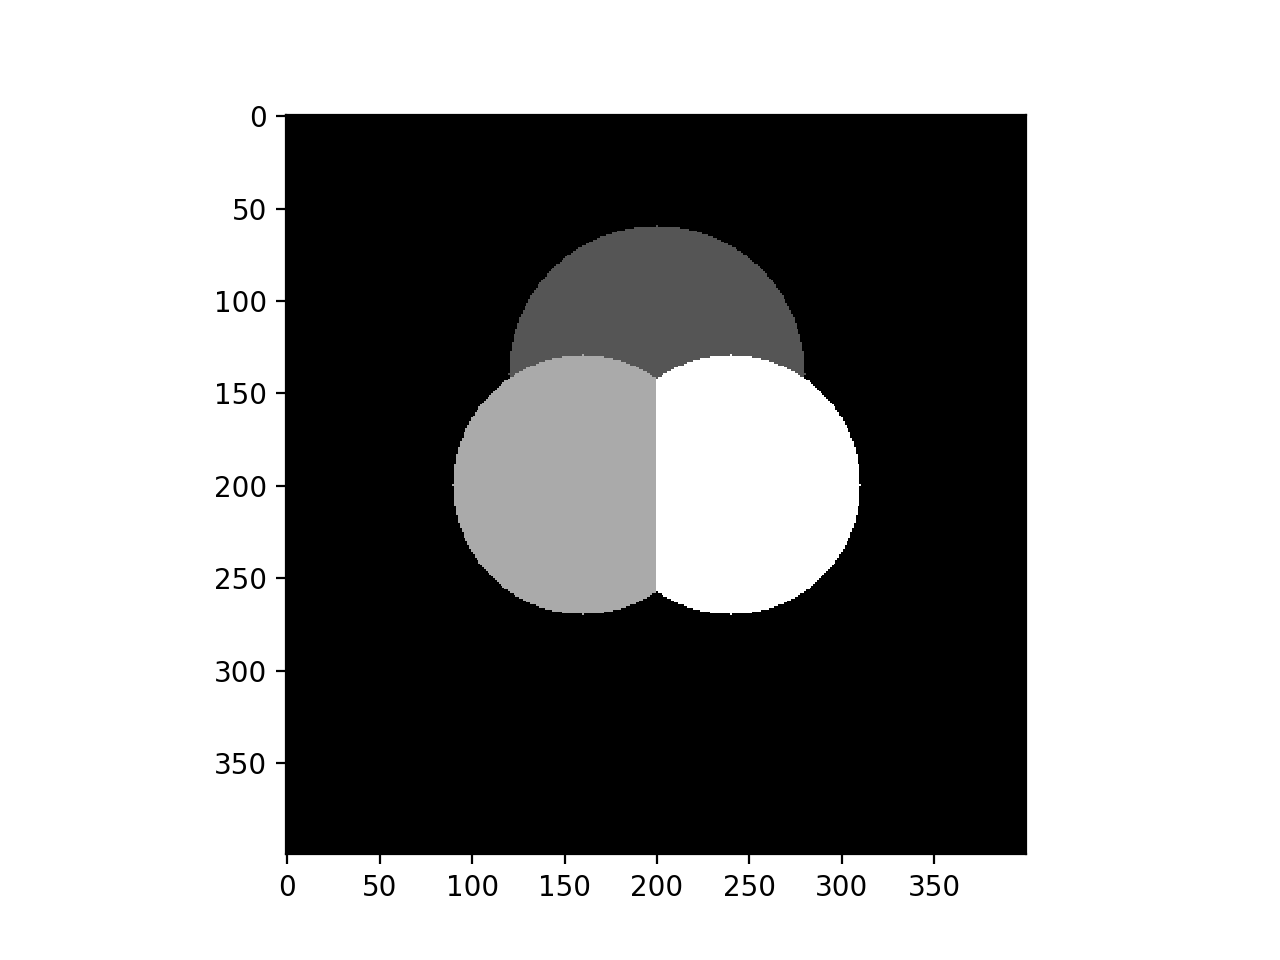

In [20]:
from skimage import io
import matplotlib.pyplot as plt


im = io.imread('../../Generated/three_intersecting_spheres_aniso.tif')
print(im.shape)
plt.figure()
plt.imshow(im[100],cmap='gray')
plt.show()


In [13]:
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook  

In [21]:




from ipywidgets import interact
im_pad = np.pad(im, 1, mode='reflect')

# Get possible shifts in all directions
shifts = itertools.product([0,1], repeat=3)

# Check and accumulate differences in shifts
outlines = np.zeros_like(im, dtype=np.bool)
print(outlines.shape)
for shift in shifts:
    zs0, ys0, xs0 = [slice(1, None) if s else slice(None) for s in shift]
    zs1, ys1, xs1 = [slice(None,-1) if s else slice(None) for s in shift]
    comparison = im_pad[zs0, ys0, xs0] != im_pad[zs1, ys1, xs1]
    outlines  += comparison[:im.shape[0],  :im.shape[1],  :im.shape[2]]
    outlines  += comparison[-im.shape[0]:, -im.shape[1]:, -im.shape[2]:]  # Symmetry
    
# Re-annotate the cell identities
outlines_id = outlines * im

# Report
print(outlines.dtype, outlines.shape)
print(outlines_id.dtype, outlines_id.shape)

pointArray=np.where(outlines==True)
pointArray1=list(zip(pointArray[0],pointArray[1],pointArray[2]))
print(len(pointArray1))
#TES=findTE(pointArray1,im)
#print(TES)



#array of indices 

(200, 400, 400)
bool (200, 400, 400)
uint8 (200, 400, 400)
254738


In [22]:
TES,teDict=findTE(pointArray1,im)
for x in teDict:
    print(x)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


In [23]:
@interact(z=(0, im.shape[0]-1, 1))
def show_stack(z=im.shape[0]//2):
    
    plt.figure(figsize=(8,8))
    plt.imshow(outlines_id[z], cmap='gray')
    
    TES_z_x = []
    TES_z_y = []
    for TE in TES:
        if TE[2] == z:
            TES_z_x.append(TE[0])
            TES_z_y.append(TE[1])
    
    plt.scatter(TES_z_x, TES_z_y, c='r', alpha=0.5, s=5)
    
    plt.show()

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

<IPython.core.display.Javascript object>


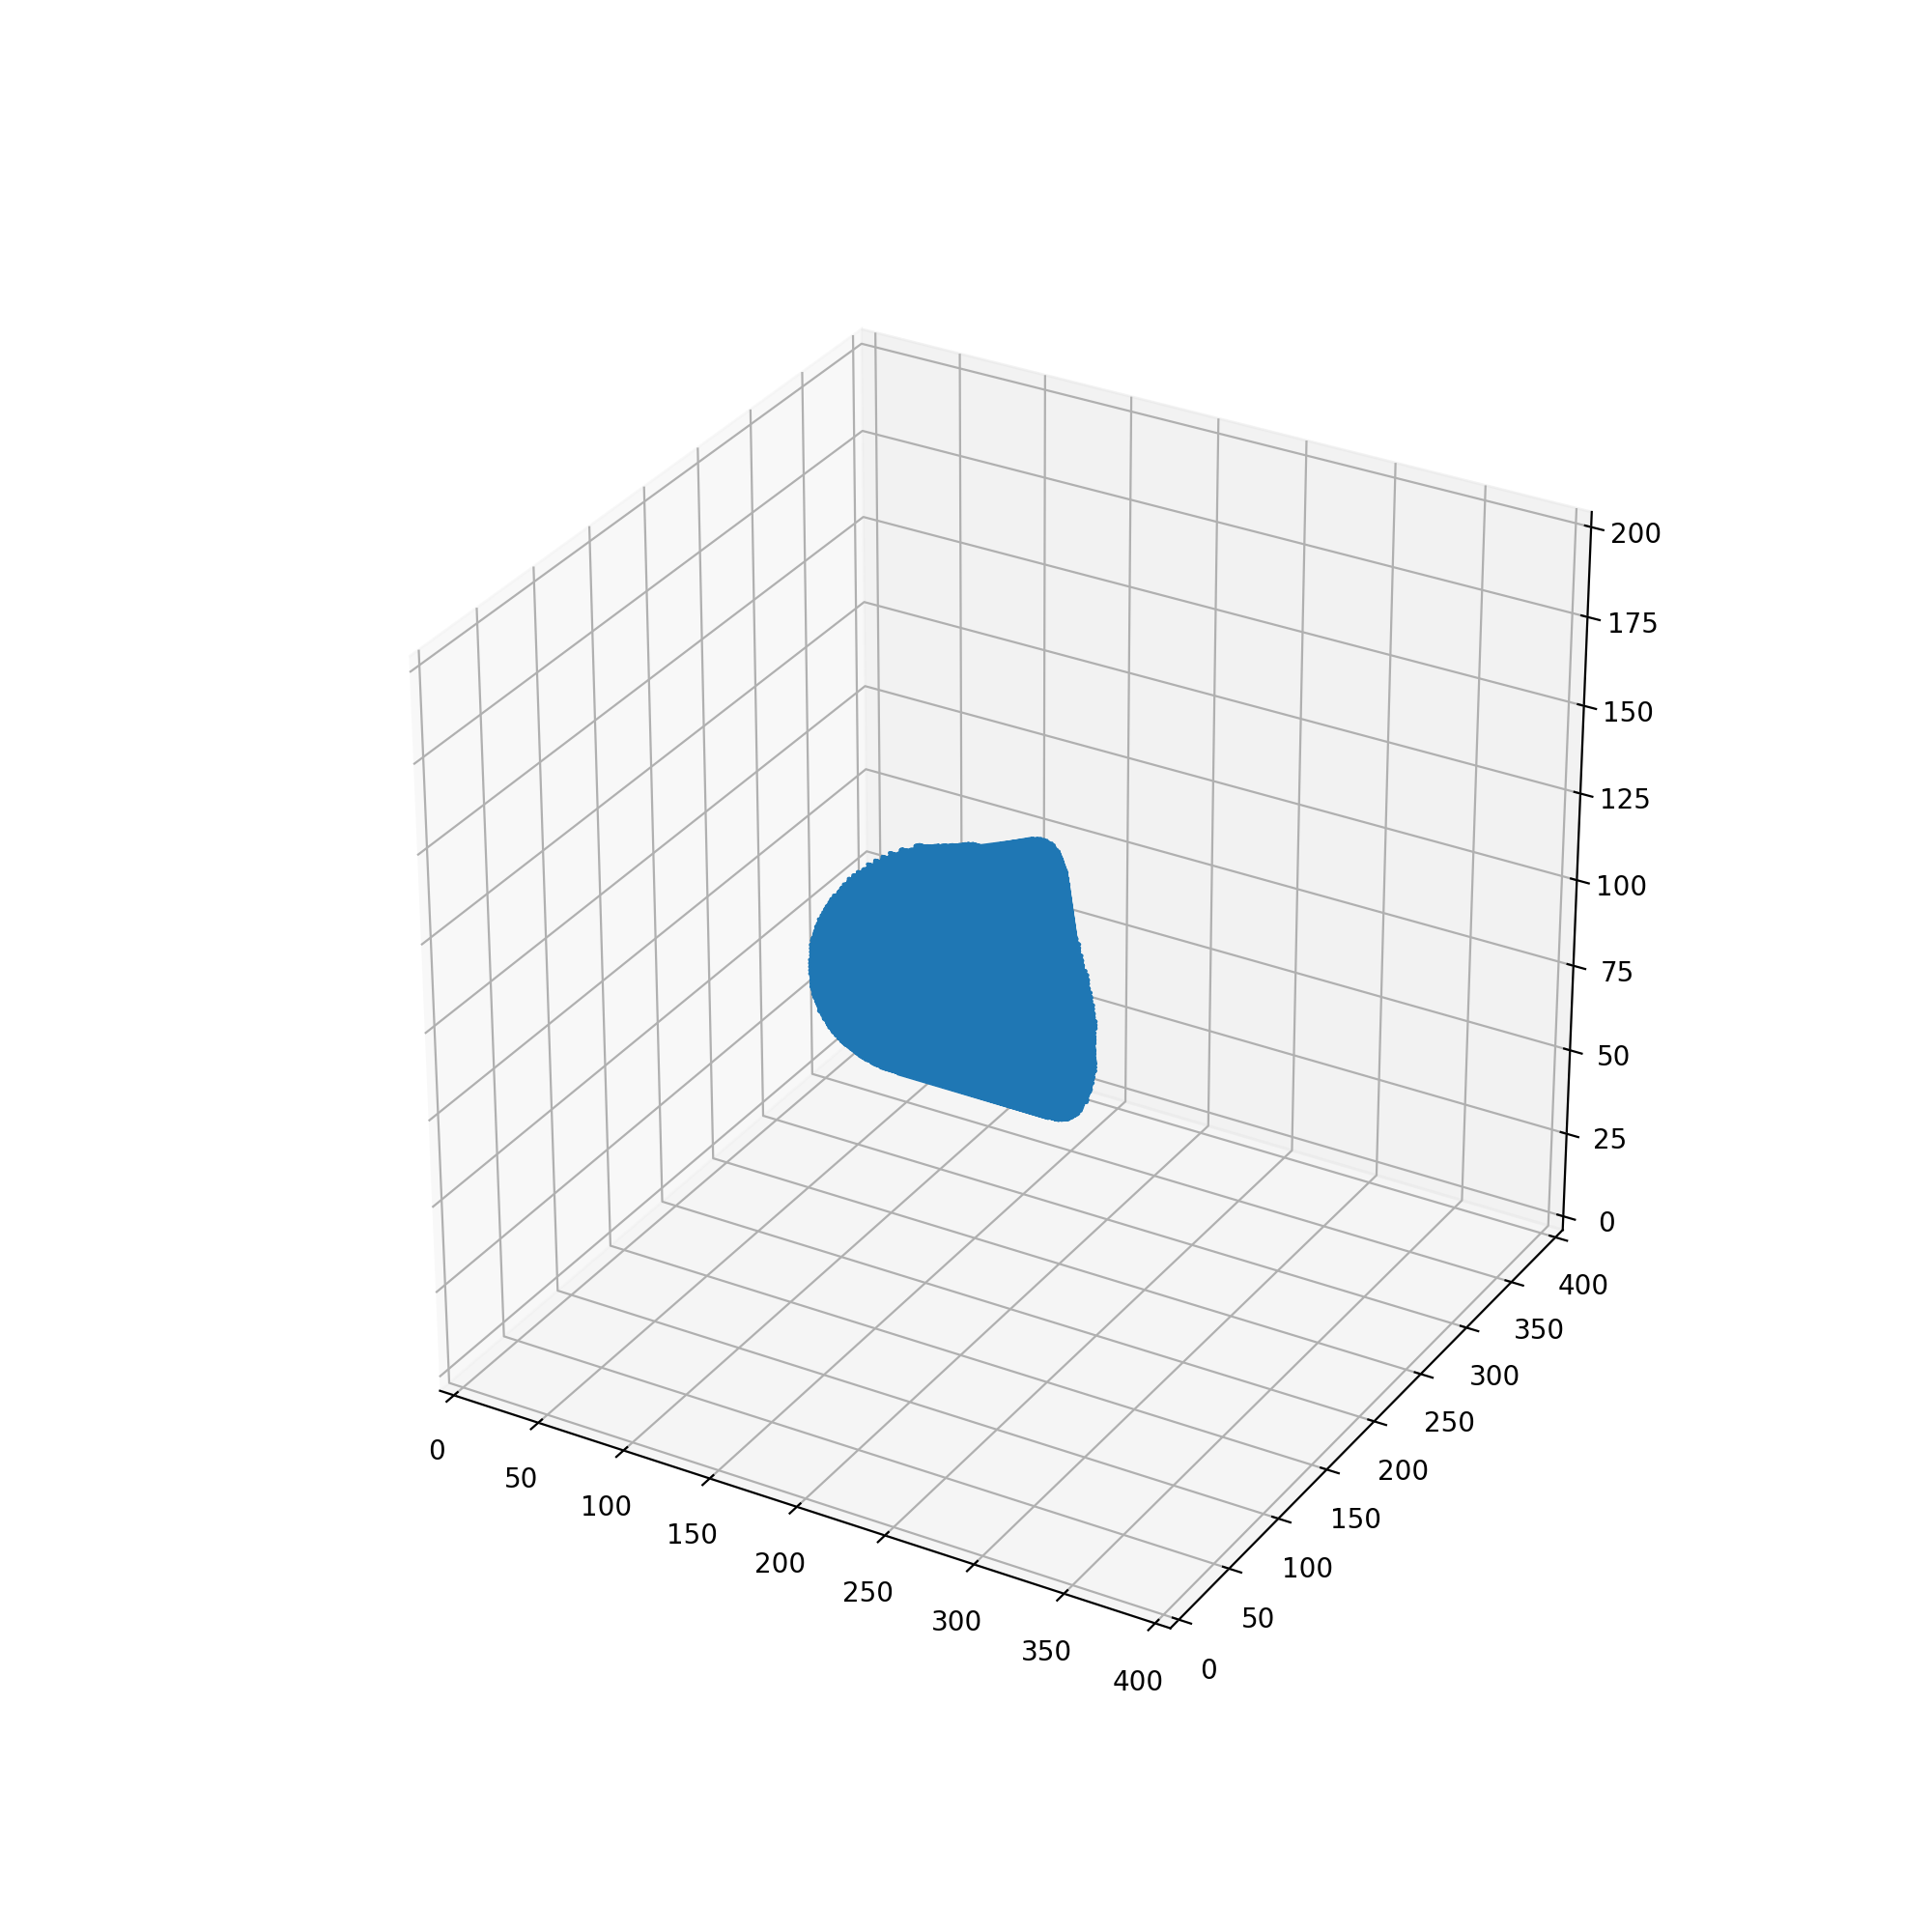

In [24]:
from mpl_toolkits.mplot3d import Axes3D

x = [TE[0] for TE in TES]
y = [TE[1] for TE in TES]
z = [TE[2] for TE in TES]
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)


ax.set_xlim([0,400])
ax.set_ylim([0,400])
ax.set_zlim([0,200])
plt.show()

<IPython.core.display.Javascript object>


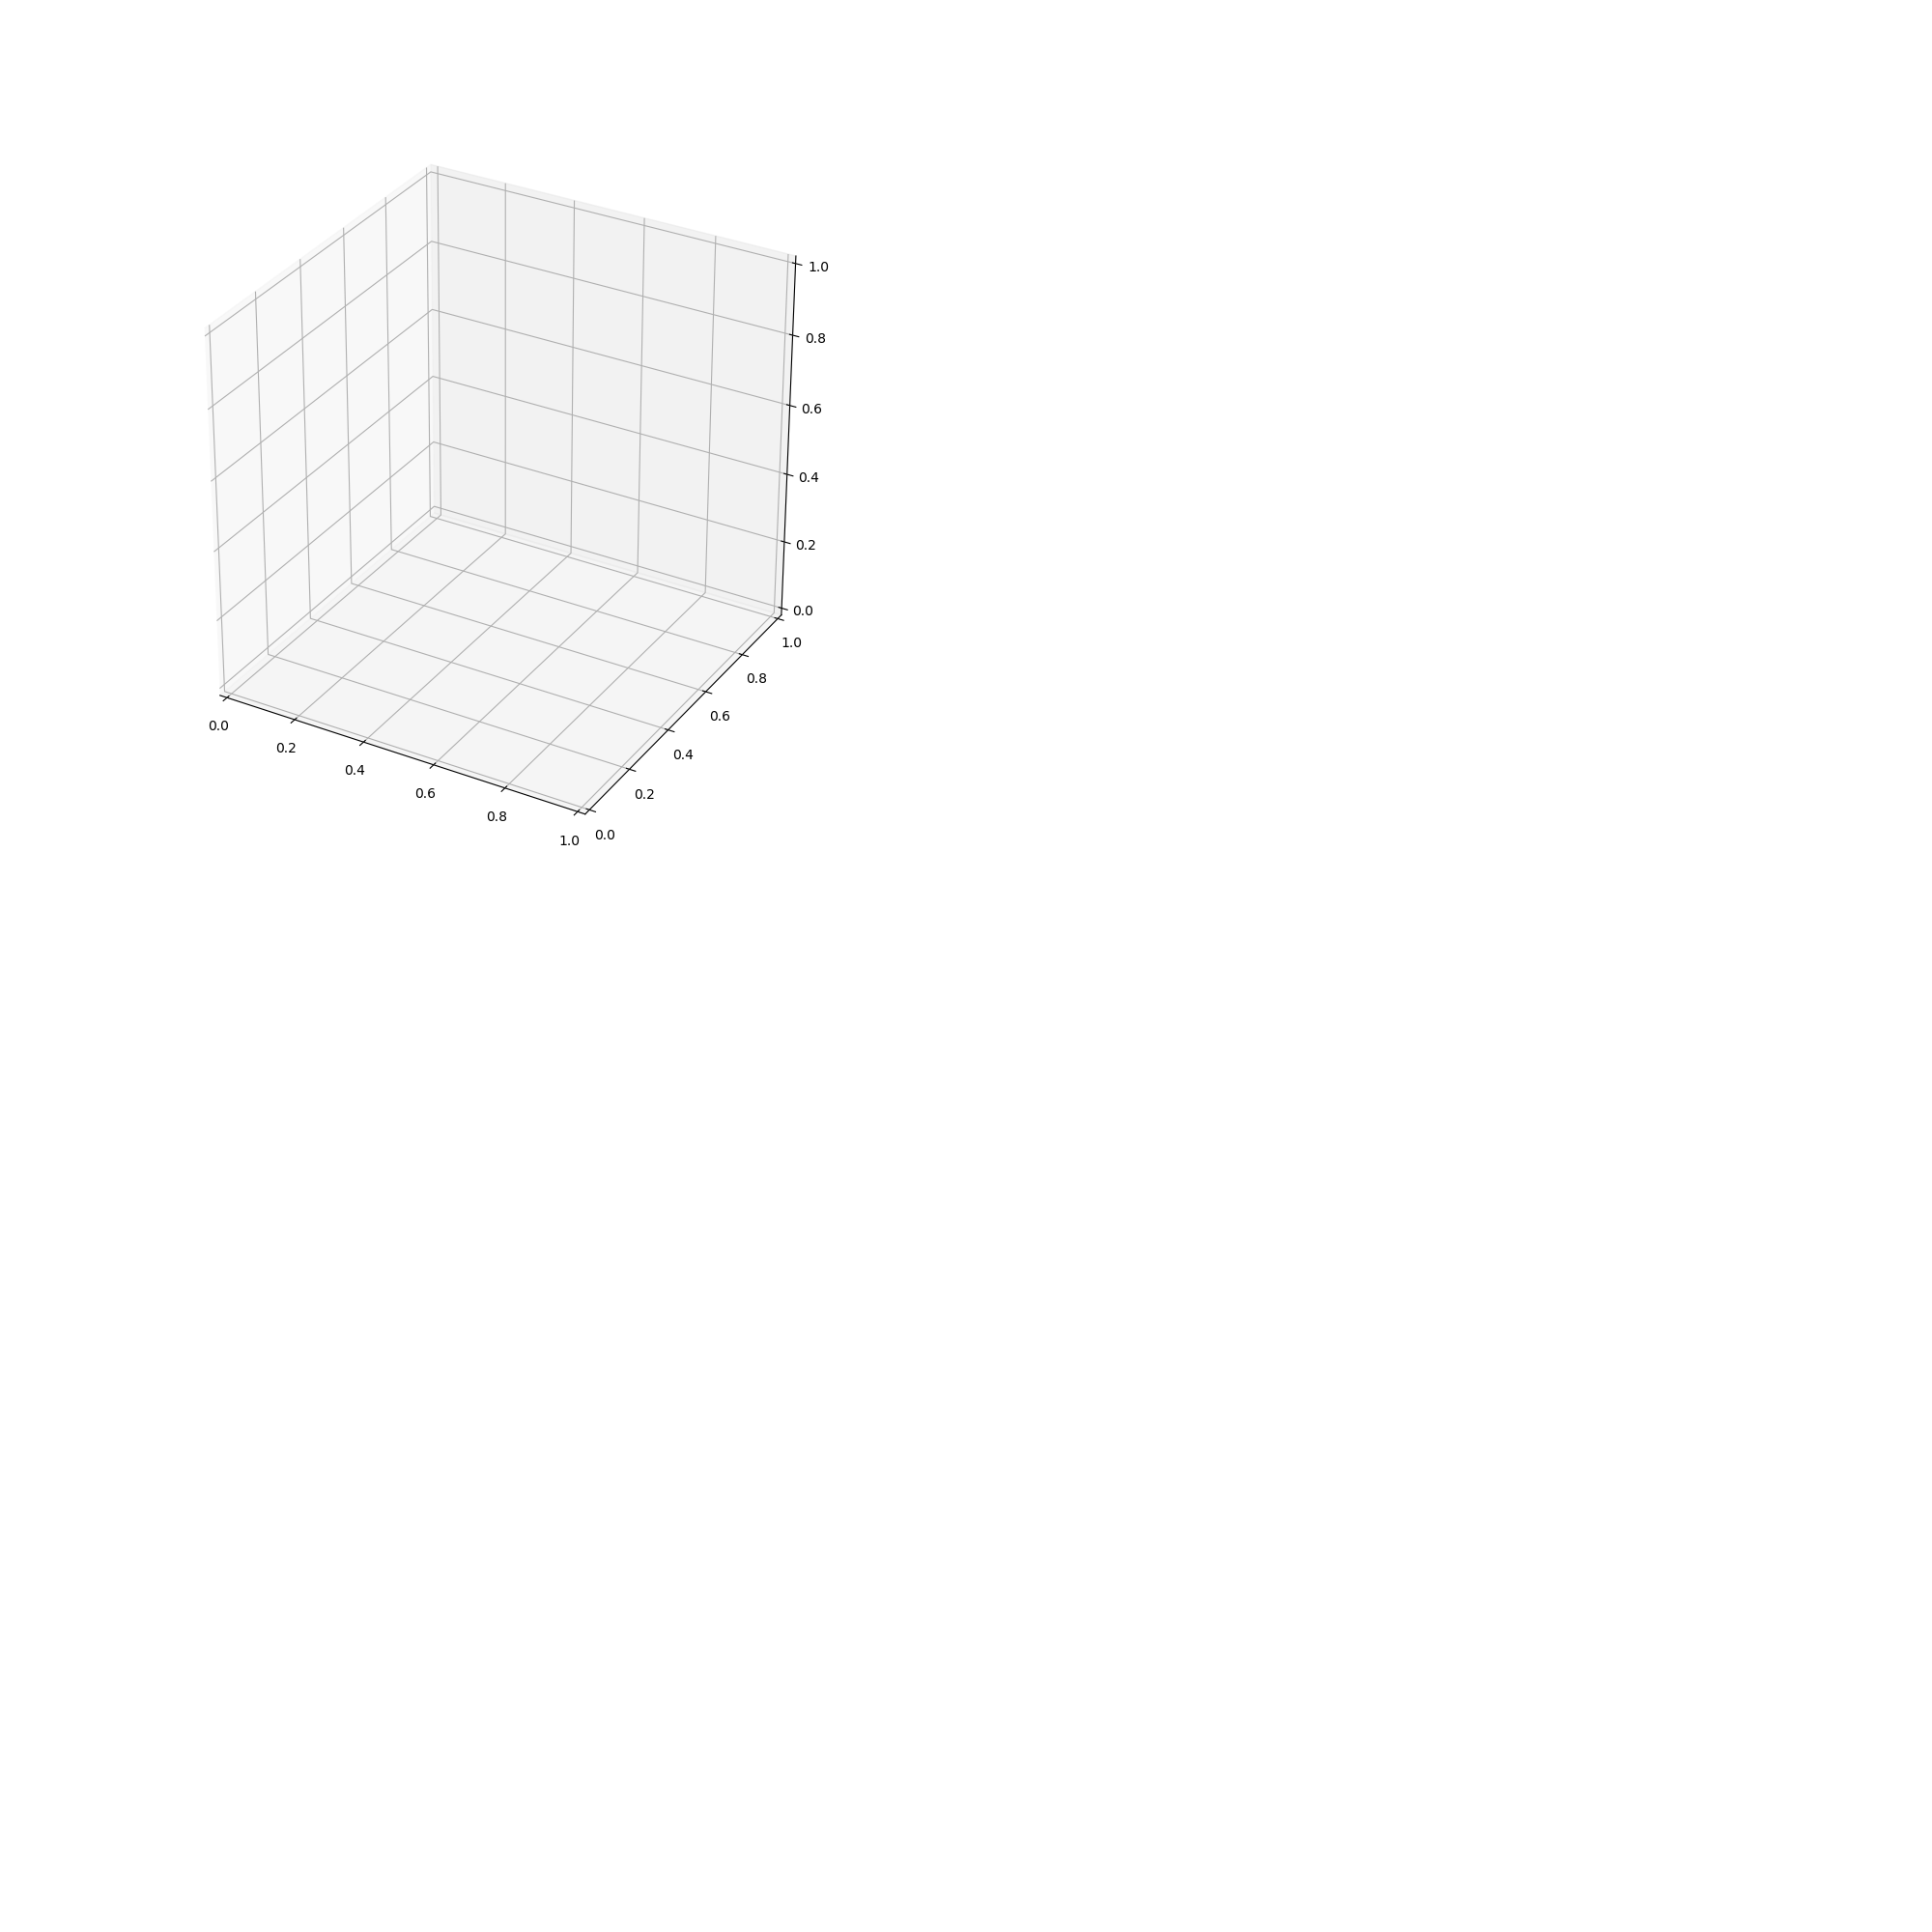

IndexError: tuple index out of range

In [25]:
import scipy.interpolate as sciint 
totalArray=[x,y,z]
spline=sciint.splprep(x=totalArray, k=2)
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')

ax.plot(spline[0], spline[1], spline[2])

ax.set_xlim([0,400])
ax.set_ylim([0,400])
ax.set_zlim([0,200])
plt.show()
